#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
import os
#os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [3]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [5]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [6]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [7]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [9]:
model = Sequential()

W0810 22:13:04.513217 139620787275584 deprecation_wrapper.py:119] From /home/jianhao/opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [8]:
#卷積層1

In [10]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

W0810 22:13:07.368023 139620787275584 deprecation_wrapper.py:119] From /home/jianhao/opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 22:13:07.370587 139620787275584 deprecation_wrapper.py:119] From /home/jianhao/opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [11]:
model.add(Dropout(rate=0.25))

W0810 22:13:09.192788 139620787275584 deprecation_wrapper.py:119] From /home/jianhao/opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0810 22:13:09.199034 139620787275584 deprecation.py:506] From /home/jianhao/opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

W0810 22:13:11.414761 139620787275584 deprecation_wrapper.py:119] From /home/jianhao/opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [16]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [17]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(10, activation='softmax'))

In [19]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [20]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

W0810 22:13:30.941696 139620787275584 deprecation_wrapper.py:119] From /home/jianhao/opt/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0810 22:13:30.957805 139620787275584 deprecation_wrapper.py:119] From /home/jianhao/opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [22]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         


W0810 22:13:33.478528 139620787275584 deprecation.py:323] From /home/jianhao/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 7s 180us/step - loss: 2.1651 - acc: 0.1984 - val_loss: 2.0518 - val_acc: 0.2961
Epoch 2/12
37500/37500 [==============================] - 5s 122us/step - loss: 1.9551 - acc: 0.2959 - val_loss: 1.9356 - val_acc: 0.3454
Epoch 3/12
37500/37500 [==============================] - 5s 123us/step - loss: 1.8342 - acc: 0.3471 - val_loss: 1.8422 - val_acc: 0.3820
Epoch 4/12
37500/37500 [==============================] - 5s 121us/step - loss: 1.7304 - acc: 0.3819 - val_loss: 1.7486 - val_acc: 0.4178
Epoch 5/12
37500/37500 [==============================] - 5s 122us/step - loss: 1.6497 - acc: 0.4097 - val_loss: 1.6802 - val_acc: 0.4407
Epoch 6/12
37500/37500 [==============================] - 5s 123us/step - loss: 1.5856 - acc: 0.4309 - val_loss: 1.6532 - val_acc: 0.4478
Epoch 7/12
37500/37500 [==============================] - 5s 123us/step - loss: 1.5310 - acc: 0.4531 - val_loss: 1.5888 - 

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()
    

#定義一個繪圖函數
def show_train_history_each(train_acc,test_acc, hst):
    plt.plot(hst.history[train_acc])
    plt.plot(hst.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

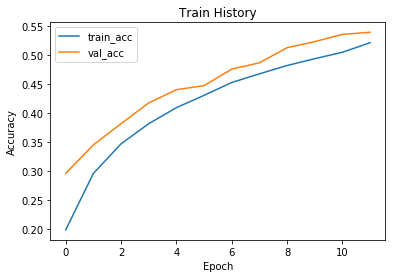

In [24]:
show_train_history('acc','val_acc')

In [30]:
train_history.history

{'val_loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 'val_acc': [0.10248000000119209,
  0.10248000000119209,
  0.10248000000119209,
  0.10248000000119209,
  0.10248000000119209,
  0.10248000000119209,
  0.10248000000119209,
  0.10248000000119209,
  0.10248000000119209,
  0.10248000000119209,
  0.10248000000119209,
  0.10248000000119209],
 'loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 'acc': [0.09917333332061767,
  0.09917333332300186,
  0.09917333332618078,
  0.0991733333293597,
  0.09917333332618078,
  0.09917333332220714,
  0.09917333332459131,
  0.09917333334287008,
  0.09917333332379659,
  0.09917333332300186,
  0.09917333332459131,
  0.0991733333214124]}

In [24]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

In [25]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history2=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)   

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 5s 124us/step - loss: 1.3262 - acc: 0.5272 - val_loss: 1.4090 - val_acc: 0.5464
Epoch 2/12
37500/37500 [==============================] - 5s 121us/step - loss: 1.3011 - acc: 0.5358 - val_loss: 1.3754 - val_acc: 0.5514
Epoch 3/12
37500/37500 [==============================] - 5s 122us/step - loss: 1.2800 - acc: 0.5439 - val_loss: 1.3296 - val_acc: 0.5619
Epoch 4/12
37500/37500 [==============================] - 5s 121us/step - loss: 1.2571 - acc: 0.5528 - val_loss: 1.3075 - val_acc: 0.5738
Epoch 5/12
37500/37500 [==============================] - 5s 122us/step - loss: 1.2357 - acc: 0.5593 - val_loss: 1.2973 - val_acc: 0.5775
Epoch 6/12
37500/37500 [==============================] - 5s 122us/step - loss: 1.2198 - acc: 0.5668 - val_loss: 1.2749 - val_acc: 0.5822
Epoch 7/12
37500/37500 [==============================] - 5s 122us/step - loss: 1.2079 - acc: 0.5721 - val_loss: 1.2666 - 

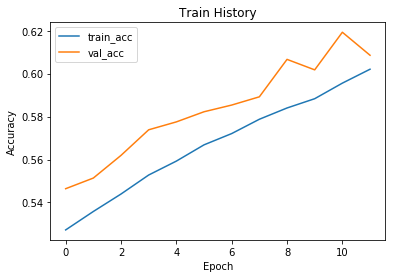

In [27]:
show_train_history_each('acc','val_acc',train_history2)

In [28]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [29]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history3=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=3, batch_size=128, verbose=1)   

Train on 37500 samples, validate on 12500 samples
Epoch 1/3
37500/37500 [==============================] - 5s 131us/step - loss: 0.1751 - acc: 0.9307 - val_loss: 0.1872 - val_acc: 0.9261
Epoch 2/3
37500/37500 [==============================] - 5s 122us/step - loss: 0.1740 - acc: 0.9311 - val_loss: 0.1871 - val_acc: 0.9262
Epoch 3/3
37500/37500 [==============================] - 5s 127us/step - loss: 0.1735 - acc: 0.9314 - val_loss: 0.1860 - val_acc: 0.9266


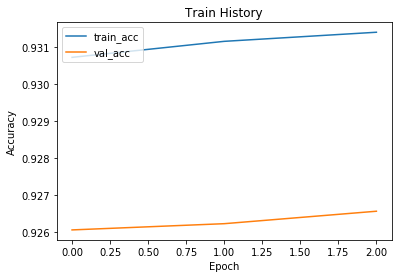

In [31]:
show_train_history_each('acc','val_acc',train_history3)